### Gradient Descent

--------------------------------------------------------

We want to build a linear regression model by gradient descent.

#### Gradient Descent

**[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)** is an iterative approach to determining a local minimum of a differentiable function. Steps should be repeatedly taken in the opposite direction of the gradient (or approximate gradient) of the function at the current point, since this is the direction of steepest descent. Everytime when the prediction is not correct, the gradient descent will help to correct the weight vector to the right direction for the next iteration.

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/350px-Gradient_descent.svg.png" width="400"/> </td>
<td> <img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="500"/> </td>
</tr></table>

1. We first build a linear model: 
$\hat{y} = X\times \hat{w}_{i}$ + b  
We sample the weight: w_hat and bias: b from a uniform distribution.  

2. We write a loss function. We use Mean Square Error here. $\displaystyle\frac{1}{2}\sum_{i=1}^{n}(x_{i}\hat{w}_{i} +b_{i} - y_{i})^2$  

3. Calculate the gradient of the loss function $\displaystyle\frac{\partial L}{\partial w}$ and $\displaystyle\frac{\partial L}{\partial b}$  
<center>$\displaystyle\frac{\partial L}{\partial w} = \sum_{i=1}^{n}(x_{i}\hat{w}_{i} +b_{i} - y_{i})x_{i} $</center>  
<center>$\displaystyle\frac{\partial L}{\partial b} = \sum_{i=1}^{n}(x_{i}\hat{w}_{i} +b_{i} - y_{i})$</center>  

4. Set up a learning rate alpha  and update w_hat and b.  
Updated $\hat{w}$ = previous $\hat{w}$ - alpha $\displaystyle\times\frac{\partial L}{\partial w}$  
Updated b = previous b - alpha $\displaystyle\times\frac{\partial L}{\partial b}$  

We do not want a too large alpha (large steps) because it might overshoot the minimum, but also do not want a too small alpha (small steps) because it might take a long time to train. Thus, we may need to try a couple times to find the right learning rate.


5. Repeat this process for different times (iteration): 10, 100, 1000, and 10000 times and calculate their losses and compare.

---------------------

### In Class Example
---------------------

In class we create the data manually. There are only 4 observations, and one feature and one y.

Our task is to use gradient descent to train the linear regression model.

* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/)

Import libraries and create data X and y

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1,1.5,2.5,4])
y = np.array([2,3.5,3,5])

Next we write a loss function MSE_loss = $\displaystyle\frac{1}{2}\sum_{i=1}^{n}(x_{i}\hat{w}_{i} +b_{i} - y_{i})^2$  

In [2]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 
               for i,x in enumerate(X))/M
    return MSE_loss

Next we caculate the gradient descent $\displaystyle\frac{\partial L}{\partial w}$ and $\displaystyle\frac{\partial L}{\partial b}$  and set learning rate alpha = 0.12. Everytime when the prediction is not correct, the gradient descent will help to correct the weight vector to the right direction for the next iteration.


In [3]:
alpha = 0.12 #learning rate
def gradL(X,y, w,b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

We randomly sample initial weight and bias from unifrom distribution, and start the learning with iteration by using gradient descent and learning rate to update the weight and bias. We iterate 10, 20, 30, and 50 times and compare their loss at the end.

Loss at iter10 = 0.15834066480232126
Loss at iter20 = 0.1482755335034524
Loss at iter30 = 0.14181148546976366
Loss at iter50 = 0.1349940418925248


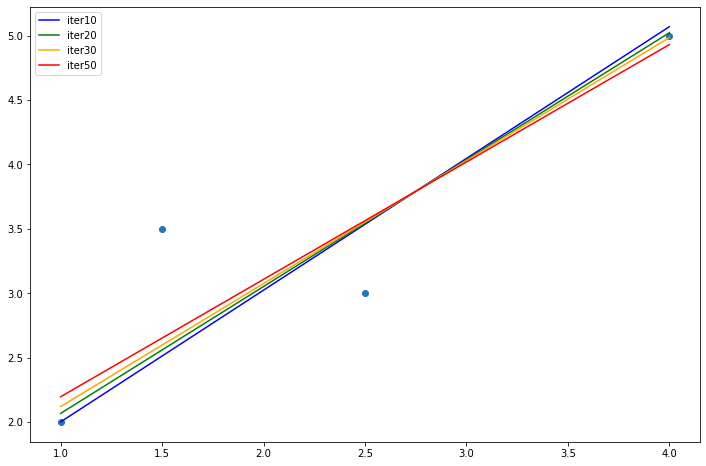

In [4]:
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()  

We can see the more iteration, the better the line fits the data.

#### If we try larger alpha?

Loss at iter10 = 0.7670896481482772
Loss at iter20 = 0.6876469737505664
Loss at iter30 = 0.6188614980168423
Loss at iter50 = 0.5077243521473856


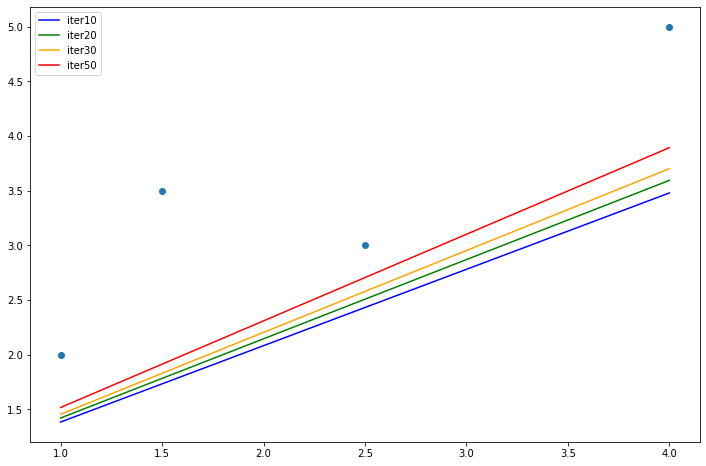

In [5]:
alpha = 0.001
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

small alpha indicate the model learns slower, and it did not learn as well as when alpha = 0.12.

-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
The dataset we will be using is [Fish Dataset](https://www.kaggle.com/aungpyaeap/fish-market/version/2). This dataset is a record of 7 common different fish species in fish market sales. It contains 7 columns and 159 rows.  
The columns in the datasets are: 
* Species (7 species)
* Weight (weight of fish in Gram g)
* Length1 (vertical length in cm)
* Length2 (diagonal length in cm)
* Length3 (cross length in cm)
* Height (height in cm)
* Width (diagonal width in cm)   

 -------------------------     
    
##### We will use Length3 as our y and Length1 as our X and make regression models by gradient descent



The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/doc/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [seaborn](https://seaborn.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/)

We first import the packages

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [7]:
df = pd.read_csv('Fish.csv')
# X = np.array([1,1.2,2.8,3.5,4.9])
# y = np.array([2,2.8,3.5,4.9,5])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


See the dimension of the dataset. (7 columns and 159 observations)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


See the summary of the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


We explore the data and visualize the relationship between features by seven species.

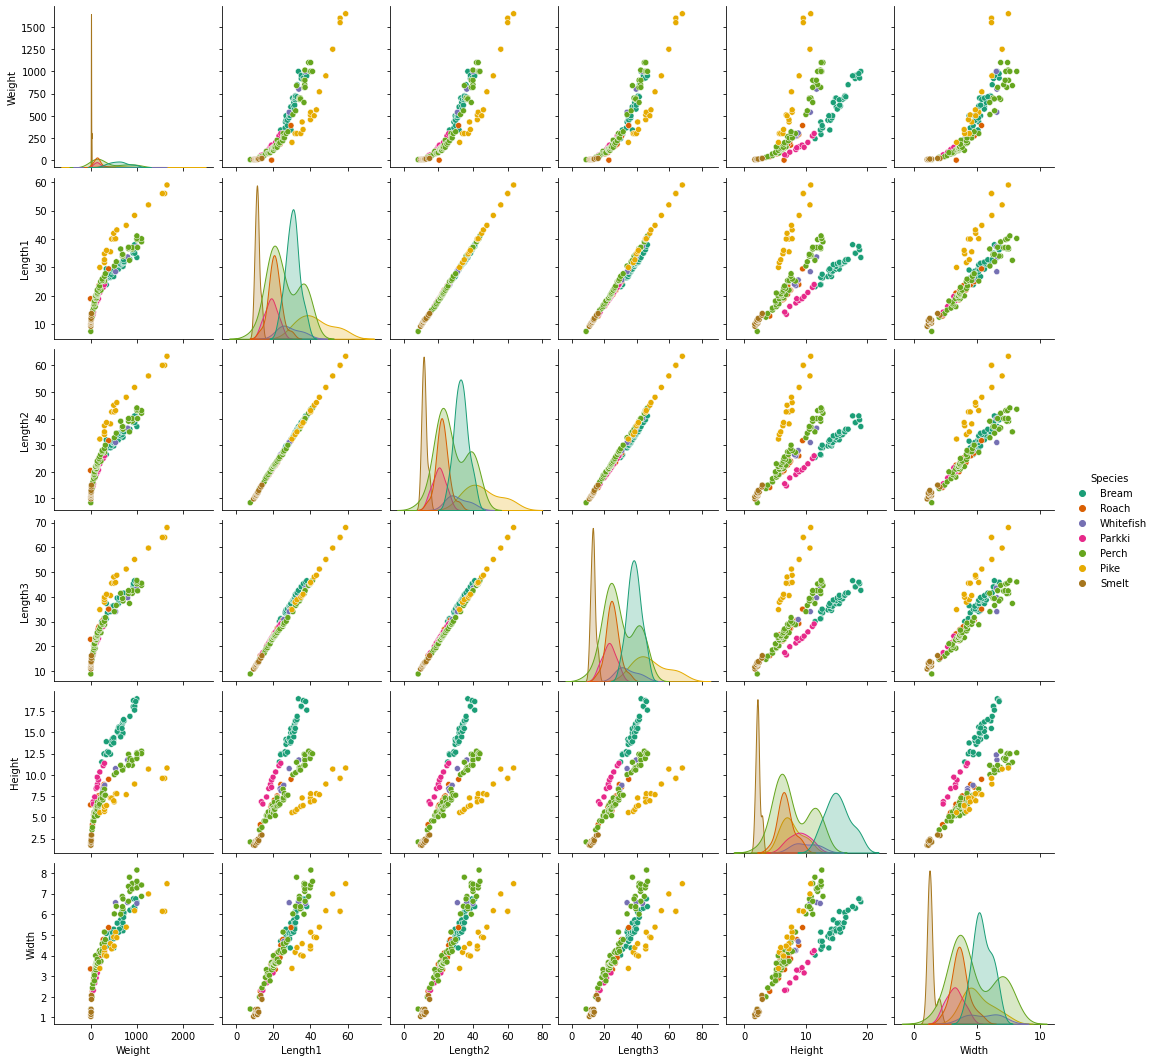

In [10]:
#data exploration
sns.pairplot(df, hue='Species',palette='Dark2')

Visualize Length1 vs Width

<AxesSubplot:xlabel='Length1', ylabel='Width'>

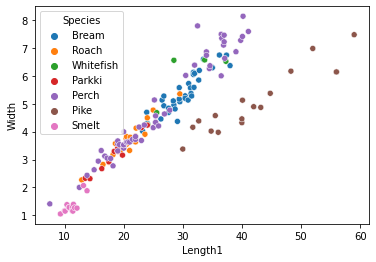

In [11]:
sns.scatterplot(x=df['Length1'],y=df['Width'],hue=df['Species'])

Next we set X as Length1 and y as Width. Then, we scale the X and y by normalization to make sure both variables have the same scale. We each x subtract x mean and divided by the standard deviation of x.

In [12]:
X = df['Length1']
y = df['Width']
X =  preprocessing.scale(X)
y =  preprocessing.scale(y)

Next we write a loss function MSE_loss = $\displaystyle\frac{1}{2}\sum_{i=1}^{n}(x_{i}\hat{w}_{i} +b_{i} - y_{i})^2$  

In [13]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 
               for i,x in enumerate(X))/M
    return MSE_loss

Next we caculate the gradient descent $\displaystyle\frac{\partial L}{\partial w}$ and $\displaystyle\frac{\partial L}{\partial b}$  and set learning rate alpha = 0.12. Everytime when the prediction is not correct, the gradient descent will help to correct the weight vector to the right direction for the next iteration.


In [14]:
alpha = 0.12 #learning rate
def gradL(X,y,w,b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

We randomly sample initial weight and bias from unifrom distribution, and start the learning with iteration by using gradient descent and learning rate to update the weight and bias. We iterate 1, 10, 20, and 100times and compare their loss at the end.

Loss at iter1 = 0.39863966682724106
Loss at iter10 = 0.15160864971676663
Loss at iter20 = 0.1262450780473547
Loss at iter100 = 0.1241123914436733


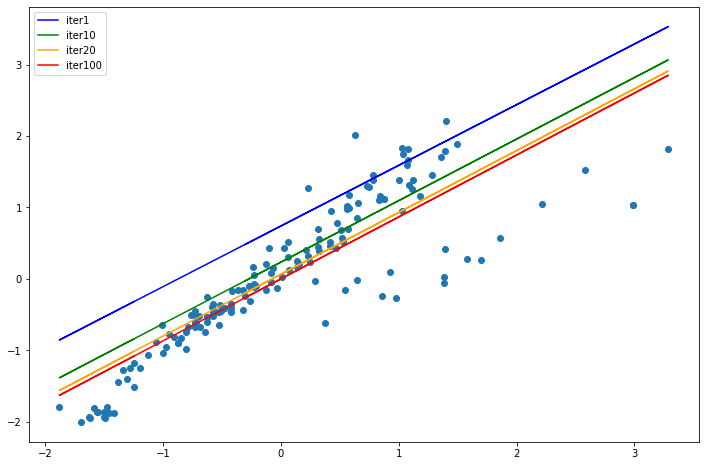

In [15]:
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {1:'blue', 10:'green', 20:'orange' , 100:'red'}
for i in range(10001):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [1, 10, 20, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()      

In conclusion, the larger the iteration the smaller the loss. Large iteration means that we update the weight and bias many times so that our models learn better and thus yield smaller loss.   

------------

Next, we try a smaller learning rate alpha = 0.012

Loss at iter1 = 0.5521905993904307
Loss at iter10 = 0.46857978780624554
Loss at iter20 = 0.3946869846748469
Loss at iter100 = 0.163322509347623


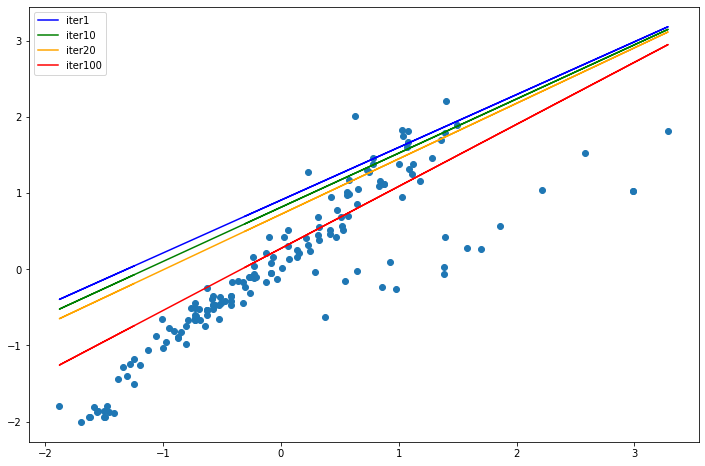

In [16]:
alpha = 0.012
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {1:'blue', 10:'green', 20:'orange' , 100:'red'}
for i in range(10001):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [1, 10, 20, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()    

We can see that the loss is larger than when alpha = 0.12. The model with learning rate = 0.012 learns slower than alpha = 0.12.

Next, we try a larger learning rate alpha = 0.5

Loss at iter1 = 0.12825121067223572
Loss at iter10 = 0.12411240722922212
Loss at iter20 = 0.12411239144089482
Loss at iter100 = 0.12411239144087974


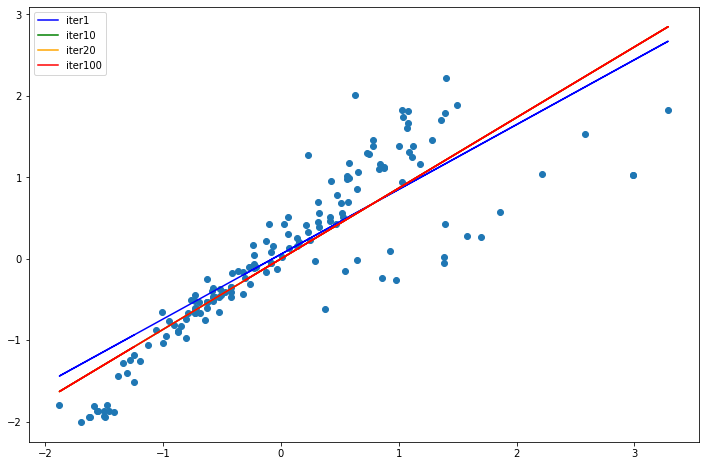

In [17]:
alpha = 0.5
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {1:'blue', 10:'green', 20:'orange' , 100:'red'}
for i in range(10001):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [1, 10, 20, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()    

We see that when alpha = 0.5, the model learn and converge faster after 20 iteration!

#### Conclusion
It is important to pick a right alpha to train, otherwise it will take long time to converge or it will not converge well.